# Salary based on positions

A firm hire someone for a new job. This person comes from another company where he had a position between Region Manager and Partner (level 6.5). He mentionned that for this position he had a 160.000$ salary. The HR would like to be sure of that information. Based on the position salaries of his previous company, we will determine if this future employee is honest or not.

In [11]:
# Importing the libraries
import numpy as npa
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
# Buidling matrix of features and dependent variable
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

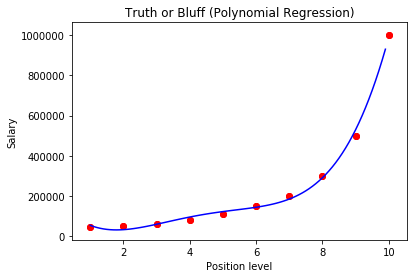

In [8]:
# Visualising the Polynomial Regression results with a smooth curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting a new result with Polynomial Regression
lin_reg.predict(poly_reg.fit_transform(6.5))

array([ 158862.4526516])

The salary mentionned by the employee seems Ok for his position and HR could trust him. 